In [97]:
#import pandas and matplot to use throughout notebook code
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#read csv file of arrests data in allegheny county 
arrestsData = pd.read_csv("arrestsData.csv", index_col="ARRESTTIME")

#use a variable to store the arrests in September 2022 as a dataframe 
storeData = arrestsData.query('ARRESTTIME.str.startswith("2022-09")', engine="python")
storeData.sample(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
ARRESTTIME,,,,,,,,,,,,,,,,
2022-09-13T12:48:00,77080,2051621,22148437,56.0,M,B,"Zenith WY & Felicia WY Pittsburgh, PA 15208","3929(a)(1) Retail Theft; takes possession of, ...","8100 Block Frankstown AV Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.883334,40.455446
2022-09-05T09:48:00,76866,2051421,22143596,23.0,M,B,"Foreland ST & James ST Pittsburgh, PA 15212",5123 Contraband. / 13(a)(16) Possession of Con...,"Foreland ST & James ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.000868,40.454294
2022-09-20T20:14:00,77687,2052199,22153106,48.0,M,B,"1300 Block Sherman AV Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"1300 Block Sherman AV Pittsburgh, PA 15212",Central North Side,1,2206.0,1.0,1.0,-80.009969,40.456450
2022-09-12T20:03:00,80366,2055806,22148116,44.0,F,W,"Middle ST & Foreland ST Pittsburgh, PA 15212",5902(a)(1) Prostitution / 13(a)(32) Paraphern...,"Middle ST & Foreland ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.999393,40.454577
2022-09-07T11:07:00,77353,2051856,22144786,46.0,M,B,"Frankstown AV & N Homewood AV Pittsburgh, PA 1...",4910 Tampering with or Fabricating Physical Ev...,"Frankstown AV & N Homewood AV Pittsburgh, PA 1...",Homewood North,5,1302.0,9.0,2.0,-79.896301,40.457405
2022-09-18T01:40:00,77154,2051674,22151353,29.0,M,B,"Hamilton AV & Sterrett ST Pittsburgh, PA 15208",9501 Bench Warrant,"Hamilton AV & Sterrett ST Pittsburgh, PA 15208",Homewood South,5,1303.0,9.0,2.0,-79.895234,40.454113
2022-09-15T13:17:00,76997,2051560,22118246,20.0,F,B,"800 Block Chartiers AV Pittsburgh, PA 15220",903 Criminal Conspiracy. / 3701 Robbery.,"Lorenz AV & Fredonia ST Pittsburgh, PA 15220",Elliott,6,2020.0,2.0,5.0,-80.041016,40.443726
2022-09-11T06:10:00,76915,2051498,22147188,29.0,F,B,"Steuben ST & Middletown RD Pittsburgh, PA 15205",5503 Disorderly Conduct. / 5505 Public Drunken...,"Steuben ST & Middletown RD Pittsburgh, PA 15205",Crafton Heights,6,2814.0,2.0,5.0,-80.055374,40.443943
2022-09-27T19:28:00,77486,2051968,22157111,26.0,M,B,"200 Block East Ohio ST Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"200 Block East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,NaN,NaN,NaN,NaN


In [98]:
#store just neighborhood column of 'storeData'
plotData = storeData.iloc[:, [9]]
plotData.sample(10)

,INCIDENTNEIGHBORHOOD
ARRESTTIME,
2022-09-02T10:36:00,Bloomfield
2022-09-28T01:51:00,NaN
2022-09-02T02:28:00,West Oakland
2022-09-20T13:10:00,Central Business District
2022-09-16T20:49:00,Lincoln-Lemington-Belmar
2022-09-19T09:00:00,Hays
2022-09-02T09:49:00,South Shore
2022-09-18T01:21:00,Glen Hazel
2022-09-22T12:39:00,Outside City


Text(0, 0.5, 'Number of Arrests')

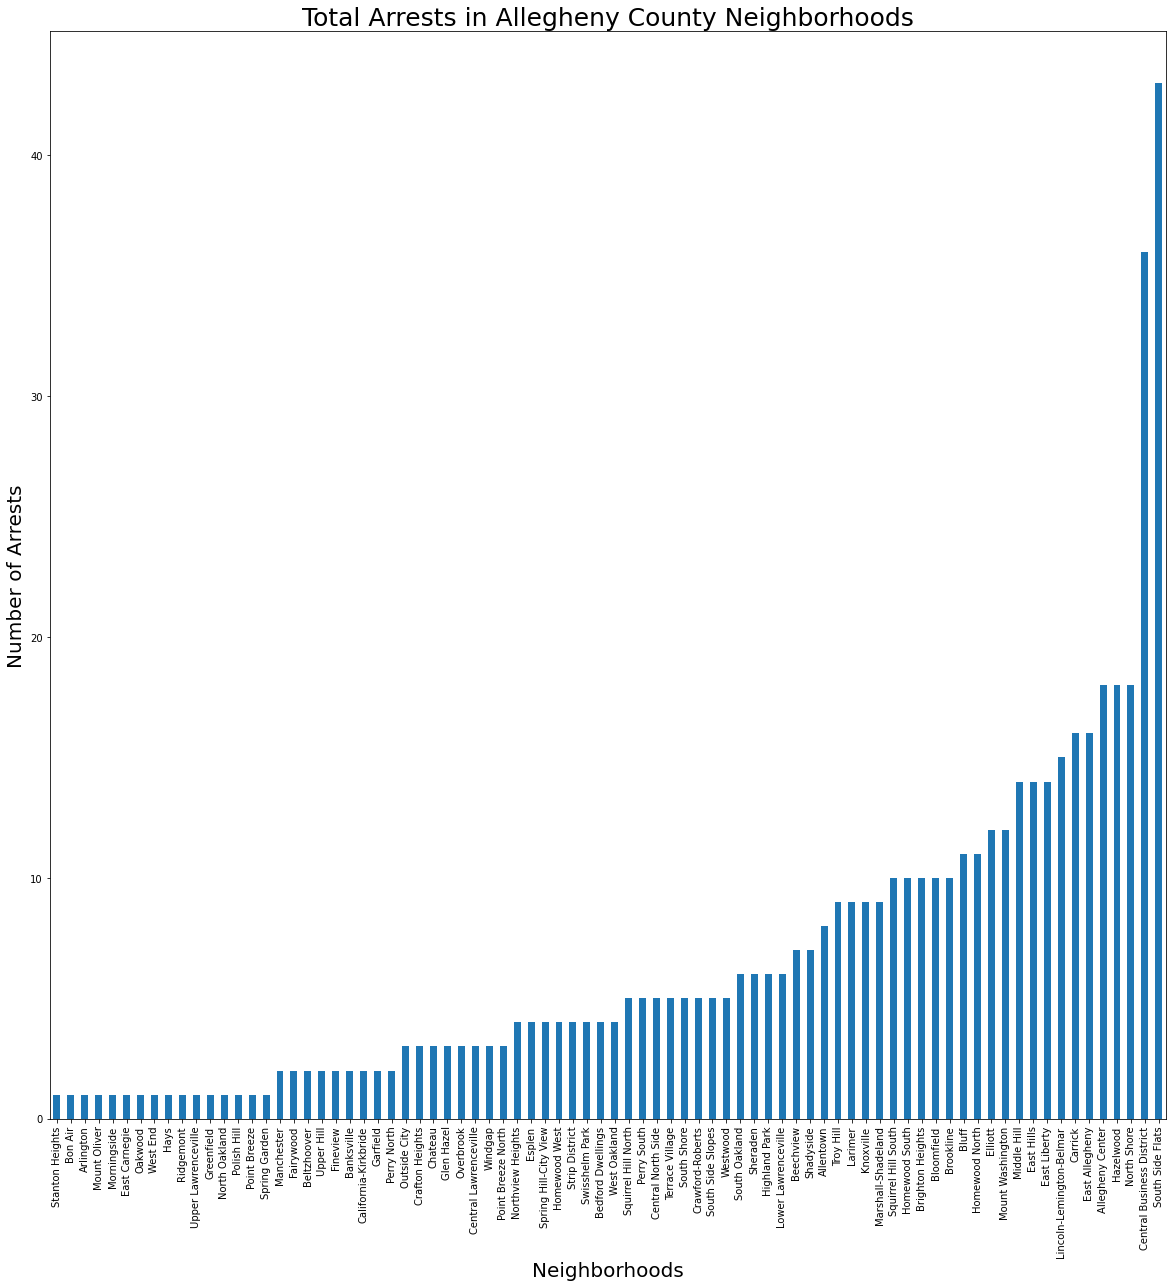

In [99]:
#graph total number of arrests in each neighborhood in 'storeData'
plotData['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True).plot(kind='bar', figsize = (20, 20))
plt.title("Total Arrests in Allegheny County Neighborhoods", fontsize = 25)
plt.xlabel("Neighborhoods", fontsize = 20)
plt.ylabel("Number of Arrests", fontsize = 20)

In [101]:
#make a dataframe of just the wanted neighborhoods - matching with the neighborhoods of the other two datasets
item_query_mask = plotData['INCIDENTNEIGHBORHOOD'].str.contains('East Hills|Knoxville|East Allegheny|Homewood North|Lower Lawrenceville|Crafton Heights|Fineview|California-Kirkbride|Homewood West|Allentown|Homewood South|Larimer|Bluff|Central Business District|North Shore|Carrick|Highland Park|Bon Air|Brighton Heights|Garfield', na=False)
realPlotData = plotData[item_query_mask]
realPlotData = realPlotData.copy()
realPlotData.sample(10)

,INCIDENTNEIGHBORHOOD
ARRESTTIME,
2022-09-25T16:42:00,Brighton Heights
2022-09-05T09:48:00,East Allegheny
2022-09-06T03:57:00,Knoxville
2022-09-07T15:10:00,Carrick
2022-09-20T04:15:00,North Shore
2022-09-02T03:54:00,Allentown
2022-09-18T19:51:00,North Shore
2022-09-26T13:25:00,Homewood South
2022-09-06T17:37:00,Homewood South


Text(0, 0.5, 'Number of Arrests')

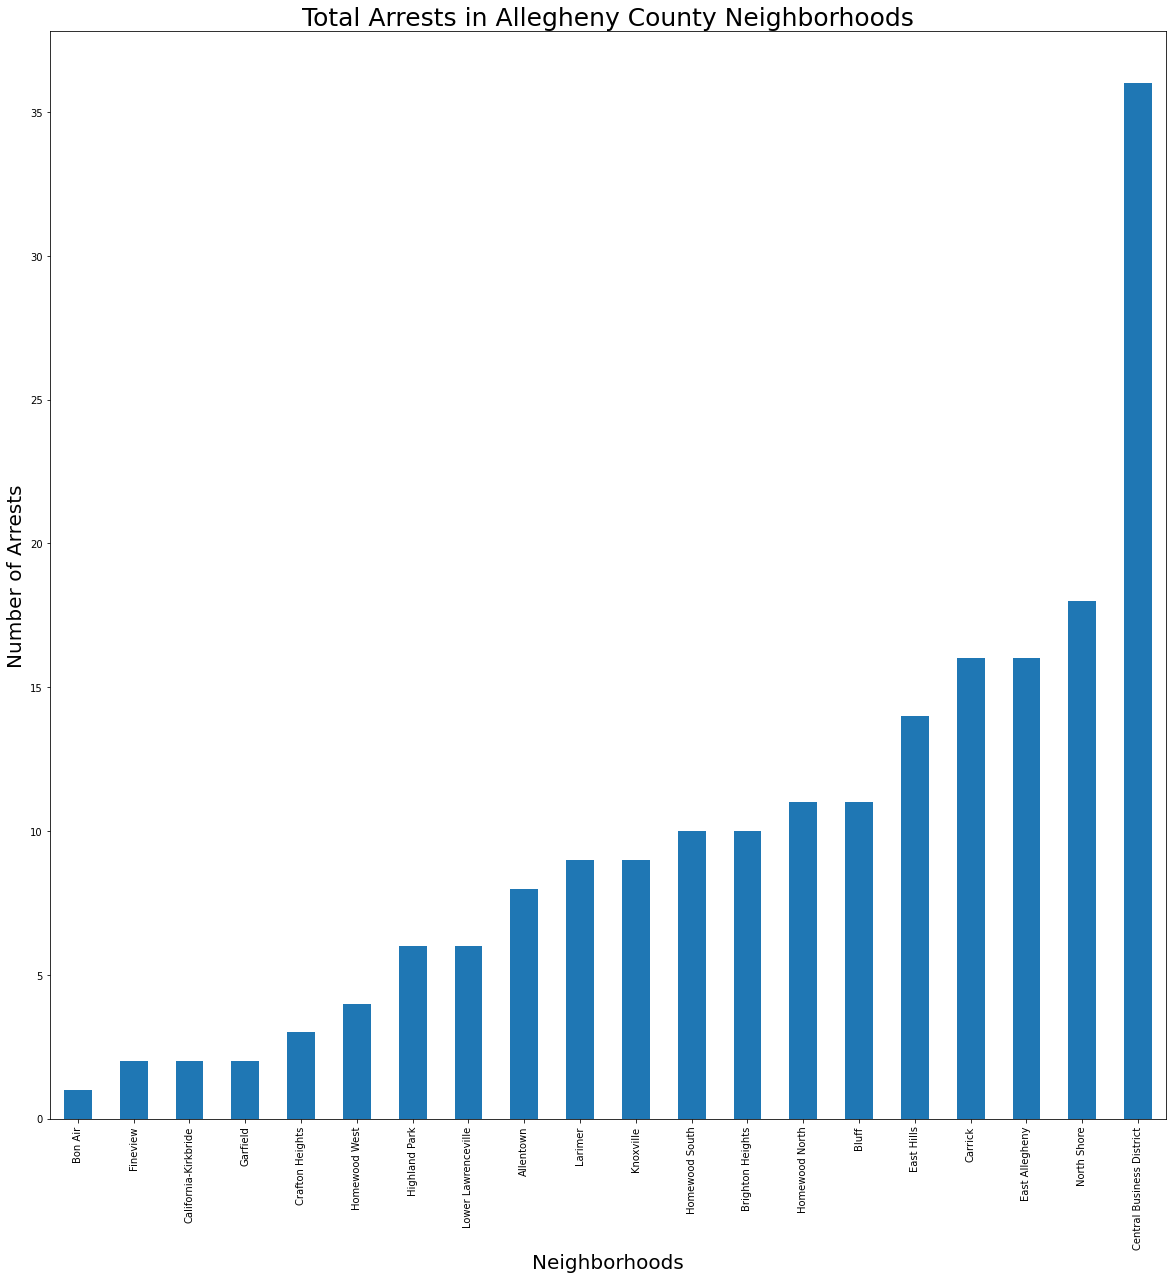

In [102]:
#graph 'realPlotData' as number of arrests for a neighborhood
realPlotData.rename(columns = {'INCIDENTNEIGHBORHOOD':'Community'}, inplace=True)
realPlotData['Community'].value_counts(ascending=True).plot(kind='bar', figsize = (20, 20))
plt.title("Total Arrests in Allegheny County Neighborhoods", fontsize = 25)
plt.xlabel("Neighborhoods", fontsize = 20)
plt.ylabel("Number of Arrests", fontsize = 20)

In [103]:
#read csv of population data for the calculation of the percentage of arrests in a neighborhood
populationData = pd.read_csv("neighborhoodPopulations.csv", index_col="_id")
populationData.sample(10)

,Community,pop_total,%race_white,%race_black,%race_other,%age_0-4,%age_5-18,%age_19-44,%age_45-64,%age_65+,%fem_married,%fem_single,%fem_sep,%fem_widowed,%fem_under15_married,%male_married,%male_single,%male_sep,%male_widowed,%male_under15_married
_id,,,,,,,,,,,,,,,,,,,,
205,West Elizabeth,808,98.0,2.0,0.0,8.0,19.0,36.0,25.0,12.0,46.0,15.0,6.0,11.0,22.0,51.0,16.0,6.0,4.0,23.0
149,Pitcairn,"4,175",100.0,0.0,0.0,6.0,19.0,36.0,24.0,15.0,41.0,18.0,8.0,15.0,17.0,47.0,24.0,7.0,3.0,19.0
79,Franklin Park,"6,135",100.0,0.0,0.0,6.0,27.0,35.0,24.0,8.0,53.0,16.0,2.0,6.0,23.0,52.0,20.0,2.0,1.0,25.0
161,Richland,"7,749",99.0,1.0,0.0,6.0,25.0,38.0,22.0,9.0,51.0,15.0,4.0,7.0,22.0,51.0,20.0,3.0,2.0,24.0
54,Dravosburg,"2,511",100.0,0.0,0.0,6.0,17.0,34.0,25.0,18.0,47.0,15.0,6.0,15.0,17.0,55.0,20.0,4.0,4.0,18.0
209,West Oakland,"5,573",30.0,68.0,2.0,6.0,23.0,45.0,14.0,11.0,11.0,52.0,11.0,11.0,15.0,17.0,46.0,9.0,4.0,25.0
67,Elliott,"3,926",96.0,3.0,1.0,6.0,20.0,36.0,24.0,14.0,39.0,22.0,7.0,15.0,16.0,45.0,25.0,6.0,3.0,22.0
29,Brentwood,"11,907",100.0,0.0,0.0,5.0,18.0,35.0,24.0,17.0,53.0,22.0,3.0,3.0,19.0,45.0,20.0,6.0,14.0,16.0
139,Oakmont,"7,039",99.0,1.0,0.0,4.0,17.0,34.0,24.0,20.0,41.0,20.0,7.0,18.0,13.0,50.0,23.0,4.0,5.0,18.0


In [104]:
#store the neighborhood and population column of 'populationData' with desired neighborhoods
storePopData = populationData.iloc[:, [0, 1]]
storePopData.head(10)
query_mask2 = storePopData['Community'].str.contains('East Hills|Knoxville|East Allegheny|Homewood North|Lower Lawrenceville|Crafton Heights|Fineview|California-Kirkbride|Homewood West|Allentown|Homewood South|Larimer|Bluff|Central Business District|North Shore|Carrick|Highland Park|Bon Air|Brighton Heights|Garfield', na=False)
realPopData = storePopData[query_mask2]
realPopData.sample(10)

,Community,pop_total
_id,,
96,Homewood North,"7,057"
104,Knoxville,"5,524"
97,Homewood South,"6,129"
105,Larimer,"5,044"
112,Lower Lawrenceville,"3,439"
60,East Hills,"5,636"
94,Highland Park,"8,514"
37,Central Business District,"3,220"
75,Fineview,"2,815"


In [105]:
#merge the datasets of number of arrests and population of each neighborhood, and make it a dataframe
finalPlotData = pd.merge(realPlotData, realPopData, how='left', on='Community')
finalPlotData.sample(10)

,Community,pop_total
110,Homewood North,"7,057"
103,Homewood South,"6,129"
107,Bluff,"4,504"
101,Central Business District,"3,220"
105,Garfield,"8,462"
131,Brighton Heights,"9,083"
4,Homewood North,"7,057"
144,Central Business District,"3,220"
42,East Allegheny,"4,505"
46,Bluff,"4,504"


In [106]:
#make a dataframe of finalPlotData's count instance of neighborhoods, and rename the columns to match the values inside
numberOfArrests = finalPlotData['Community'].value_counts().to_frame()
numberOfArrests.rename(columns = {'Community':'NumberOfArrests'}, inplace=True)
numberOfArrests.sample(10)

,NumberOfArrests
Homewood West,4
East Allegheny,16
Fineview,2
Lower Lawrenceville,6
Knoxville,9
North Shore,18
Highland Park,6
Homewood North,11
Larimer,9
California-Kirkbride,2


In [107]:
#reset index of 'finalPlotData'
finalPlotData.set_index('Community', inplace=True)
finalPlotData.sample(10)

,pop_total
Community,
North Shore,424
East Allegheny,"4,505"
Central Business District,"3,220"
Bluff,"4,504"
Larimer,"5,044"
Garfield,"8,462"
Central Business District,"3,220"
Homewood North,"7,057"
North Shore,424


In [108]:
#name index of 'numberOfArrests'
numberOfArrests.index.name = 'Community'

#merge 'numberOfArrests' and 'finalPlotData', dropping repeated rows
newNumberOfArrests = pd.merge(numberOfArrests, finalPlotData, how='left', on='Community')
newNumberOfArrests.drop_duplicates(inplace=True)
newNumberOfArrests.sample(10)

,NumberOfArrests,pop_total
Community,,
Homewood North,11,"7,057"
Bluff,11,"4,504"
East Hills,14,"5,636"
Brighton Heights,10,"9,083"
Larimer,9,"5,044"
Homewood West,4,"1,972"
Highland Park,6,"8,514"
Lower Lawrenceville,6,"3,439"
Bon Air,1,"1,144"


In [109]:
#create new Percentage column in dataframe and calculate the percentage of arrests per population in each neighborhood
newNumberOfArrests['Percentage'] = float
newNumberOfArrests['NumberOfArrests'] = newNumberOfArrests['NumberOfArrests'].astype(float)
newNumberOfArrests['pop_total'] = newNumberOfArrests['pop_total'].str.replace((r','), '', regex=True).str.strip()
newNumberOfArrests['pop_total'] = newNumberOfArrests['pop_total'].astype(float)
newNumberOfArrests['Percentage'] = (newNumberOfArrests['NumberOfArrests']/newNumberOfArrests['pop_total'])*100
newNumberOfArrests

,NumberOfArrests,pop_total,Percentage
Community,,,
Central Business District,36.0,3220.0,1.118012
North Shore,18.0,424.0,4.245283
East Allegheny,16.0,4505.0,0.355161
Carrick,16.0,13167.0,0.121516
East Hills,14.0,5636.0,0.248403
Homewood North,11.0,7057.0,0.155874
Bluff,11.0,4504.0,0.244227
Homewood South,10.0,6129.0,0.163159
Brighton Heights,10.0,9083.0,0.110096


Text(0, 0.5, 'Number of Arrests/Population of Neighborhood')

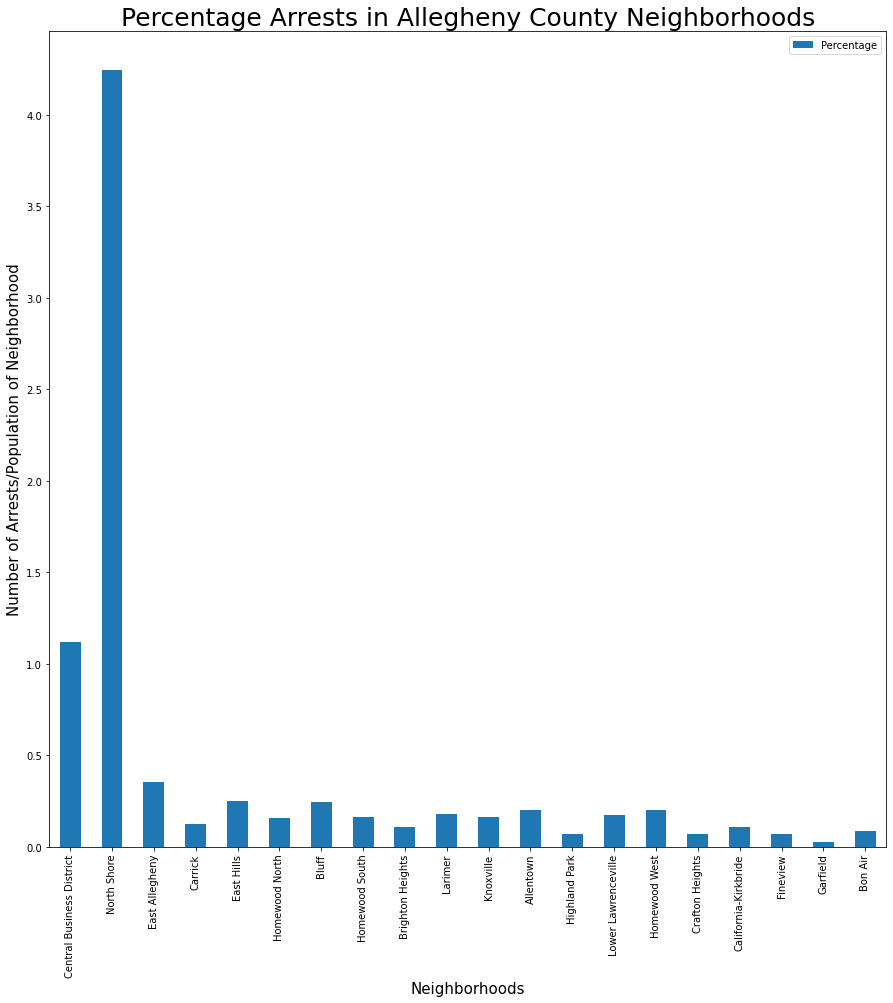

In [110]:
#graph 'newNumberOfArrests' - final representation of 'Percentage Arrests in Allegheny County Neighborhoods'
newNumberOfArrests.plot(kind='bar', y='Percentage', use_index=True, figsize=(15, 15))
plt.title("Percentage Arrests in Allegheny County Neighborhoods", fontsize = 25)
plt.xlabel("Neighborhoods", fontsize = 15)
plt.ylabel("Number of Arrests/Population of Neighborhood", fontsize = 15)

In [111]:
print('Average Percentage:', newNumberOfArrests['Percentage'].mean())

Average Percentage: 0.40536552983004803
